In [1]:
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

In [11]:
file_path = '/Users/karolina/Desktop/V/AR22_003.nc'
dataset = xr.open_dataset(file_path)
print(dataset)

<xarray.Dataset> Size: 10kB
Dimensions:    (time: 1, n_levels: 135)
Coordinates:
  * time       (time) datetime64[ns] 8B 2022-06-25T06:31:50
Dimensions without coordinates: n_levels
Data variables:
    latitude   (time) float64 8B ...
    longitude  (time) float64 8B ...
    pres       (time, n_levels) float64 1kB ...
    temp       (time, n_levels) float64 1kB ...
    cond       (time, n_levels) float64 1kB ...
    psal       (time, n_levels) float64 1kB ...
    fluo       (time, n_levels) float64 1kB ...
    oxy        (time, n_levels) float64 1kB ...
    oxysat     (time, n_levels) float64 1kB ...
    ptemp      (time, n_levels) float64 1kB ...
    sigmath    (time, n_levels) float64 1kB ...
Attributes: (12/25)
    title:                   IOPAN CTD data file
    abstract:                IOPAN CTD data file from the AREX cruise with RV...
    topiccategory:           oceans
    keywords:                Oceanography Pressure Temperature Conductivity S...
    activity_type:           

In [13]:
dataset.variables

Frozen({'time': <xarray.IndexVariable 'time' (time: 1)> Size: 8B
array(['2022-06-25T06:31:50.000000000'], dtype='datetime64[ns]')
Attributes:
    short_name:     time
    long_name:      time
    standard_name:  time, 'latitude': <xarray.Variable (time: 1)> Size: 8B
[1 values with dtype=float64]
Attributes:
    short_name:     latitude
    long_name:      latitude
    standard_name:  latitude
    units:          degree_north, 'longitude': <xarray.Variable (time: 1)> Size: 8B
[1 values with dtype=float64]
Attributes:
    short_name:     longitude
    long_name:      longitude
    standard_name:  longitude
    units:          degree_east, 'pres': <xarray.Variable (time: 1, n_levels: 135)> Size: 1kB
[135 values with dtype=float64]
Attributes:
    short_name:     pressure
    long_name:      Sea Water Pressure
    standard_name:  sea_water_pressure
    units:          dbar, 'temp': <xarray.Variable (time: 1, n_levels: 135)> Size: 1kB
[135 values with dtype=float64]
Attributes:
    short_na

In [17]:
dataset.attrs

{'title': 'IOPAN CTD data file',
 'abstract': 'IOPAN CTD data file from the AREX cruise with RV Oceania performed in summer 2022',
 'topiccategory': 'oceans',
 'keywords': 'Oceanography Pressure Temperature Conductivity Salinity Oxygen Fluorescence Potential Temperature Potential Density',
 'activity_type': 'Cruise',
 'conventions': 'CF-1.0',
 'product_name': 'ctd_arex2022',
 'history': '03-Apr-2024 creation',
 'area': 'Greenland Sea, Barents Sea, Fram Strait, Arctic Ocean',
 'platform_name': 'RV Oceania',
 'southernmost_latitude': '70.5',
 'northernmost_latitude': '81.0',
 'westernmost_longitude': '0.0',
 'easternmost_longitude': '20.0',
 'start_date': '2022-06-20 10:51:03 UTC',
 'stop_date': '2022-07-27 00:51:57 UTC',
 'institution': 'Institute of Oceanology Polish Academy of Sciences',
 'PI_name': 'Agnieszka Beszczynska-Möller',
 'PI_email': 'abesz@iopan.pl',
 'Author_name': 'Agnieszka Beszczynska-Möller',
 'Author_email': 'abesz@iopan.pl',
 'distribution_statement': 'These data are

In [67]:
from netCDF4 import Dataset
data=Dataset(file_path, moder='r')
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: IOPAN CTD data file
    abstract: IOPAN CTD data file from the AREX cruise with RV Oceania performed in summer 2022
    topiccategory: oceans
    keywords: Oceanography Pressure Temperature Conductivity Salinity Oxygen Fluorescence Potential Temperature Potential Density
    activity_type: Cruise
    conventions: CF-1.0
    product_name: ctd_arex2022
    history: 03-Apr-2024 creation
    area: Greenland Sea, Barents Sea, Fram Strait, Arctic Ocean
    platform_name: RV Oceania
    southernmost_latitude: 70.5
    northernmost_latitude: 81.0
    westernmost_longitude: 0.0
    easternmost_longitude: 20.0
    start_date: 2022-06-20 10:51:03 UTC
    stop_date: 2022-07-27 00:51:57 UTC
    institution: Institute of Oceanology Polish Academy of Sciences
    PI_name: Agnieszka Beszczynska-Möller
    PI_email: abesz@iopan.pl
    Author_name: Agnieszka Beszczynska-Möller
    Author_email: ab

In [49]:
nc_file=Dataset(file_path, 'r')
print(nc_file.variables.keys())

dict_keys(['time', 'latitude', 'longitude', 'pres', 'temp', 'cond', 'psal', 'fluo', 'oxy', 'oxysat', 'ptemp', 'sigmath'])


In [77]:
ptemp = nc_file.variables['ptemp'][0,:]
psal = nc_file.variables['psal'][0,:]

In [79]:
depth = np.arange(len(ptemp))

Text(0.5, 1.0, 'Depth Profile: Salinity and Temperature')

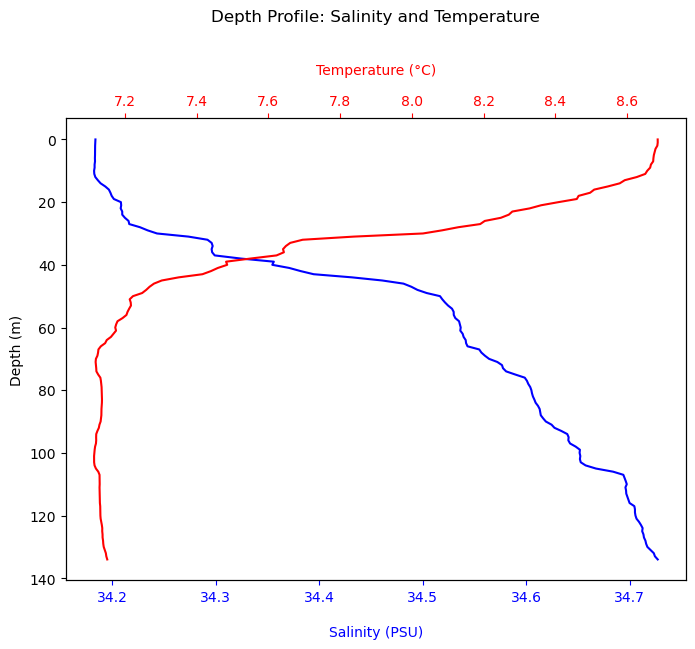

In [95]:
fig, ax1 = plt.subplots(figsize=(8,6))
#oś główna: depth vs sal
ax1.plot(psal, depth, label="psal", color="blue")
ax1.set_xlabel("Salinity (PSU)", color="blue", labelpad=15)
ax1.set_ylabel("Depth (m)")
ax1.invert_yaxis()
ax1.tick_params(axis="x", colors="blue")
 #dodatkowa oś x
ax2=ax1.twiny()
ax2.plot(ptemp, depth, label="Temperature", color="red")
ax2.set_xlabel("Temperature (°C)", color="red", labelpad=15)
ax2.tick_params(axis="x", colors="red")
plt.title("Depth Profile: Salinity and Temperature", pad=30)

In [105]:
fig.savefig("/Users/karolina/Desktop/wykresyV/wykresV1.png", dpi = 300, bbox_inches='tight')